## Explorary data analysis

In [4]:
# !pip install seaborn

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("train.csv")

In [33]:
df.shape

(404290, 6)

In [34]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [36]:
df['is_duplicate'].value_counts()

is_duplicate
0    255027
1    149263
Name: count, dtype: int64

In [38]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
211465,211465,147735,12552,Is a law degree valuable for entrepreneurs?,Is it a good idea to go to law school if you d...,0
116036,116036,10942,1441,Where can I find a professional hacker?,How can I hire a hacker?,1
37690,37690,68557,68558,What are the best activities to do in Rome?,What are some of the best activities to do in ...,1
139284,139284,221602,221603,What is the best place for iphone 6 screen rep...,How can I get an iphone 6 with water damage re...,0
31692,31692,58414,58415,How did Abdaal M. Akhtar develop his soft skil...,Is coding enough for a CSE engineer or must he...,0
40907,40907,73948,73949,Is it legal to drink alcohol while in an RV?,Why do people drink alcohol from paper sacks i...,0
108375,108375,178089,178090,Is there a problem with Somali immigrants in F...,Why is Finland not in NATO?,0
274368,274368,80532,134892,Are the new Apple Macbook pros really worth th...,What do you think of the new MacBook Pro Apple...,1
248674,248674,171795,692,Which is the best mobile under 15000,Which are best mobile phones to buy under 15000?,1
49695,49695,88419,88420,What is the best evidence that 9/11 was an ins...,Was 9/11 incident an inside job?,1


In [39]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [40]:
df.duplicated().sum()                 #if any row is completely duplicate?

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


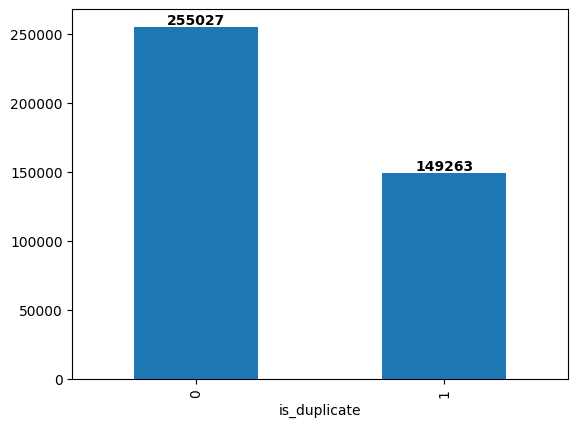

In [41]:
# Distribution of duplicate and non-duplicate questions

value_counts = df['is_duplicate'].value_counts()
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')
for i, value in enumerate(value_counts):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontweight='bold')


In [44]:
# Total repeated questions in the database

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("Number of Unique Questions -->",np.unique(qid).shape[0])
x = qid.value_counts()>1
print("Number of Questions Getting Repeated -->",x[x].shape[0])

Number of Unique Questions --> 537933
Number of Questions Getting Repeated --> 111780


In [54]:
df[df['qid2'] == 593]

,id,qid1,qid2,question1,question2,is_duplicate
296,296,592,593,How does concentric contractions differ from e...,How do concentric and eccentric contraction co...,1
3725,3725,7378,593,What are some symptoms of eccentric and concen...,How do concentric and eccentric contraction co...,1
166527,166527,73803,593,What are some characteristics of eccentric and...,How do concentric and eccentric contraction co...,1
214523,214523,73804,593,What are the differences between eccentric and...,How do concentric and eccentric contraction co...,1
314476,314476,36052,593,What are some characteristics of concentric an...,How do concentric and eccentric contraction co...,1


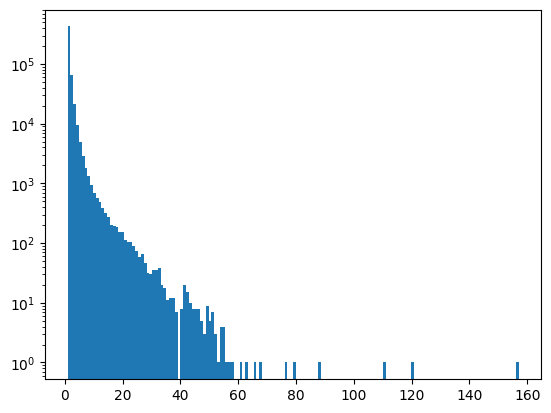

In [56]:
# Repeated question Histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale("log")
plt.show()